### Problem 1
Simulate different non-linear models. Three good models to start out with
are: SETAR(2;1;1), IGAR(2;1), and MMAR(2;1). Try different parameters.
For reporting, write the models and discuss the most essential features of
each model together with some informative plots.
Hints
R and Matlab: Check out the script 3dPlotting.R. It starts out showing a
simple way to implement a simulation of a process with a for-loop.

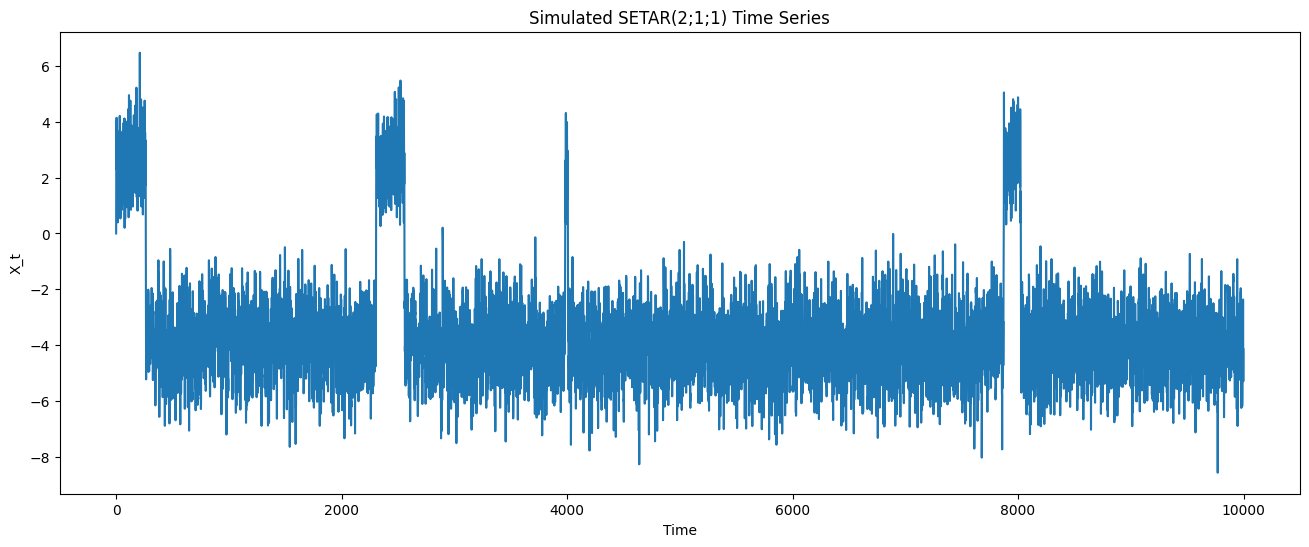

In [3]:
# Simulate SETAR(2;1;1) with different parameters and plot the results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

a_0_1 = -2
a_1_1 = 0.5
a_0_2 = 2
a_1_2 = 0.2

n = 10000
X = np.zeros(n)
for t in range(1, n):
    if X[t-1] < 0:
        X[t] = a_0_1 + a_1_1* X[t-1] + np.random.normal()
    else:
        X[t] = a_0_2 + a_1_2 * X[t-1] + np.random.normal()
df = pd.DataFrame(X, columns=['Value'])
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x=df.index, y='Value')
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.show()

df.to_csv('/Users/loveredin/Documents/GitHub/advanced_time_series_analysis/assignment_2/data.csv')

In [ ]:
df = pd.DataFrame({"X_t": X[1:], "X_t-1": X[:-1]})

# Scatter plot of X_t vs X_t-1
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x="X_t-1", y="X_t", alpha=0.5, s=20)
plt.axvline(0, color="red", linestyle="--", label="Threshold at 0")
plt.title("SETAR(2,1,1): Phase Plot of $X_t$ vs $X_{t-1}$")
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.legend()

In [ ]:
import random
# IGAR(2;1) model
# Parameters
a_00 = 2
a_01 = -0.8
a_10 = -2
a_11 = 0.3
a = [[a_00, a_01], [a_10, a_11]]
p_1 = 0.2 # probability p_1
p_2 = 1 - p_1 # probability p_2

J_t_prob = [p_1, p_2]
J_mask = [] # Binary coloring solely for plotting purposes
J_t_values = [i for i in range(len(J_t_prob))]
n = 1000
t_vec = [i + 1 for i in range(n)]
X = [0]

# Random variable addition parameters
mu = 0
sigma = 1


for t in range(1, n):

    J_t = random.uniform(0, 1)
    epsilon_t = np.random.normal(mu, sigma)
    
    # Randomly select a regime
    J_t_val = random.choices([0, 1], weights=J_t_prob)[0]
    J_mask.append(J_t_val)

    # Appending new values    
    X_t = a[J_t_val][0] + a[J_t_val][1] * X[-1] + epsilon_t
    X.append(X_t)

plt.figure(figsize=(16, 6))
plt.plot(t_vec, X, label = "IGAR(2;1) model")
plt.legend()
plt.xlabel('t')
plt.ylabel(rf'$X_{{t}}$')
plt.title(rf'Simulation of an IGAR(2; 1) model with $a_{{11}} = {a_00}$, $a_{{12}} = {a_01}$, $a_{{21}} = {a_10}$ and $a_{{22}} = {a_11}$. Probabilities $p_1 = {J_t_prob[0]}$ and $p_2 = {J_t_prob[1]}$.')
plt.show()

# Plot of lag 1

plt.figure(figsize=(16, 6))
colors = ['blue' if color == 0 else 'red' for color in J_mask]
plt.scatter(X[ : -1], X[1 : ], s = 10, alpha = 0.5, c = colors)
plt.title(rf'Increments of an IGAR(2; 1) model with $a_{{11}} = {a_00}$, $a_{{12}} = {a_01}$, $a_{{21}} = {a_10}$ and $a_{{22}} = {a_11}$. Probabilities $p_1 = {J_t_prob[0]}$ and $p_2 = {J_t_prob[1]}$.')
plt.xlabel(rf'$X_{{t-1}}$')
plt.ylabel(rf'$X_{{t}}$')
plt.show()

# Correlation Sample ACF
max_lag = 10

In [ ]:
# MMAR(2,1)
a_0_1 = -2
a_1_1 = 0.3
a_0_2 = 2
a_1_2 = -0.30

n = 1000
X = np.zeros(n)
state_history = np.zeros(n, dtype=int)
p = random.uniform(0, 1)
state = 0
for t in range(1, n):
    if state == 0:
        p = random.uniform(0, 1)
        state = 0 if p < 0.95 else 1
        state_history[t] = state
        X[t] = a_0_1 + a_1_1* X[t-1] + np.random.normal()
    else:
        X[t] = a_0_2 + a_1_2 * X[t-1] + np.random.normal()
        p = random.uniform(0, 1)
        state = 1 if p < 0.6 else 0
        state_history[t] = state
df = pd.DataFrame(X, columns=['Value'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Value')
plt.title('Simulated MMAR(2;1;1) Time Series')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.show()

In [ ]:
# Plot X vs X-1

df = pd.DataFrame({"X_t": X[1:], "X_t-1": X[:-1]})

colors = np.where(state_history[1:] == 0, "blue", "red")

plt.figure(figsize=(16,6))
plt.scatter(df["X_t-1"], df["X_t"], c=colors, alpha=0.5, s=10)
plt.xlabel("$X_{t-1}$")
plt.ylabel("$X_t$")
plt.title("MMAR(2,1) Phase Plot Colored by Regime")
plt.show()